<a href="https://colab.research.google.com/github/lambert45545/data_processing_premierleage2024/blob/main/data_processing_premierleage2024_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  regex as re
from datetime import datetime



In [ ]:
df_original=pd.read_csv("players2.csv")
df_original.head(5)
df_original.columns
#change the order of culmns
new_column_order = [
    'player', 'Date of Birth', 'country', 'Position', 'Height',
    'appearances','club', 'goals', 'wins', 'losses', 'clean_sheet',
    'goals_conceded', 'total_tackle', 'won_tackle', 'last_man_tackle',
    'blocked_scoring_att', 'interception', 'total_clearance',
    'effective_head_clearance', 'clearance_off_line', 'ball_recovery',
    'duel_won', 'duel_lost', 'won_contest', 'aerial_won', 'aerial_lost',
    'own_goals', 'error_lead_to_goal', 'goal_assist', 'total_pass',
    'big_chance_created', 'total_cross', 'accurate_cross',
    'total_through_ball', 'accurate_long_balls', 'yellow_card', 'red_card',
    'fouls', 'total_offside', 'att_hd_goal', 'att_rf_goal', 'att_lf_goal',
    'hit_woodwork', 'att_pen_goal', 'att_freekick_goal',
    'total_scoring_att', 'ontarget_scoring_att', 'big_chance_missed',
    'saves', 'penalty_save', 'punches', 'good_high_claim',
    'stand_catch,dive_catch', 'total_keeper_sweeper', 'keeper_throws',
    'goal_kicks', 'total_offside', 'att_hd_goal', 'att_rf_goal', 'att_lf_goal'
]
df=df_original[new_column_order]
df.head(30)

,player,Date of Birth,country,Position,Height,appearances,club,goals,wins,losses,...,punches,good_high_claim,"stand_catch,dive_catch",total_keeper_sweeper,keeper_throws,goal_kicks,total_offside,att_hd_goal,att_rf_goal,att_lf_goal
0,Max Aarons,04/01/2000 (23),England,Defender,178cm,82.0,Bournemouth,0.00,10.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.0,0.0
1,Zach Abbott,13/05/2006,England,Defender,NaN,0.0,Nottingham Forest,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Terry Ablade,12/10/2001,Finland,Forward,NaN,0.0,Fulham,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Tyler Adams,14/02/1999 (24),United States,Midfielder,173cm,24.0,Bournemouth,0.00,5.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
4,Tosin Adarabioyo,24/09/1997 (26),England,Defender,196cm,59.0,Fulham,1.00,16.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,0.0,0.0
5,Tayo Adaramola,14/11/2003,Ireland,Defender,NaN,0.0,Crystal Palace U21,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,Elijah Adebayo,07/01/1998 (25),England,Forward,193cm,12.0,Luton Town,0.17,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,2.0,0.0
7,Valintino Adedokun,14/02/2003 (20),Ireland,Defender,NaN,0.0,Brentford,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
8,Simon Adingra,01/01/2002 (21),Cote D’Ivoire,Forward,175cm,11.0,Brighton & Hove Albion,0.27,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,3.0,0.0
9,Adler Nascimento,25/11/2004,Portugal,Forward,NaN,0.0,Crystal Palace,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
#clean data
#df.info()
df=df.dropna(subset=['Height'])
df.fillna(0, inplace=True)
df.drop(df[df['appearances'] == 0].index, inplace=True)
df= df[~df_original['club'].str.endswith('U21')]
df.drop('total_offside',axis=1)






df['Birth Year'] = df['Date of Birth'].str.extract(r'(\d{4})')

df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')

current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Birth Year']

df.drop(columns=['Birth Year'], inplace=True)



























<ipython-input-4-b4f940082982>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df= df[~df_original['club'].str.endswith('U21')]


 **Extrat Information**

<Axes: >

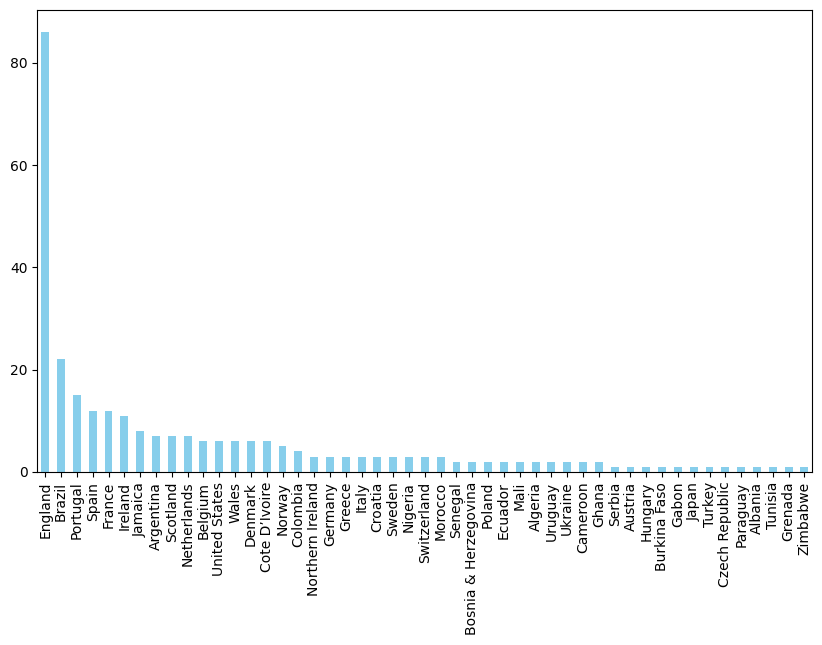

In [ ]:
nationality_counts=df['country'].value_counts()
plt.figure(figsize=(10, 6))
nationality_counts.plot(kind='bar', color='skyblue')

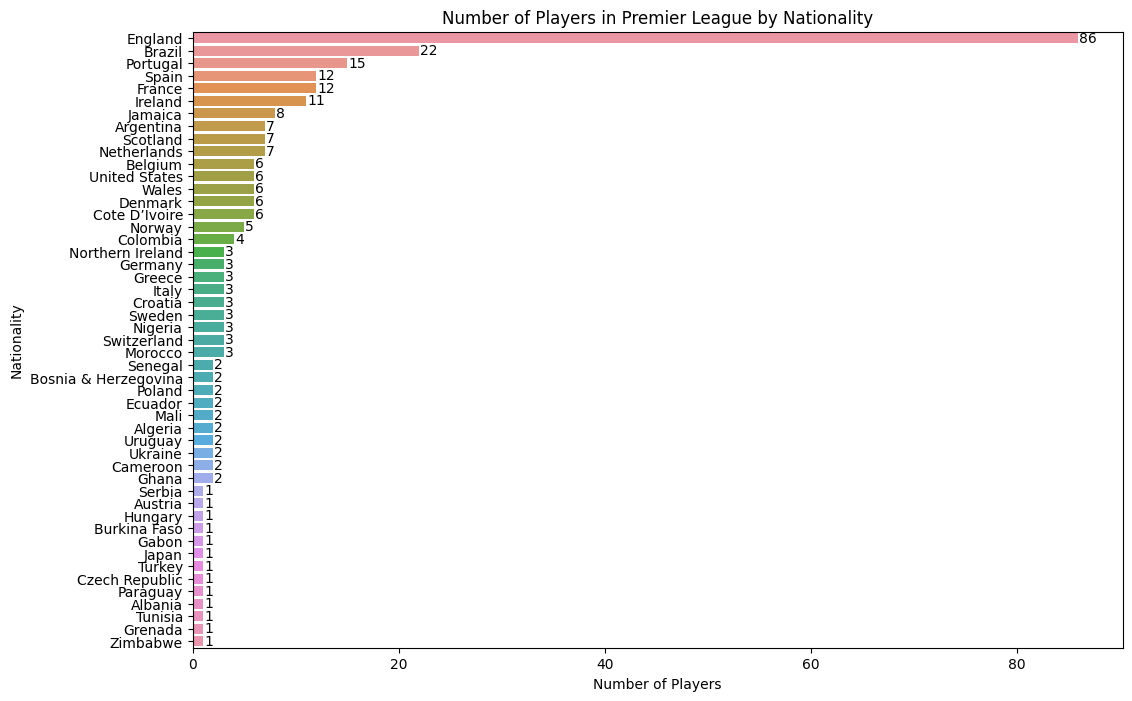

In [ ]:
nationality_counts = df['country'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Nationality', data=nationality_counts)
for i, count in enumerate(nationality_counts['Count']):
    plt.text(count + 0.1, i, str(count), ha='left', va='center')

plt.title('Number of Players in Premier League by Nationality')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

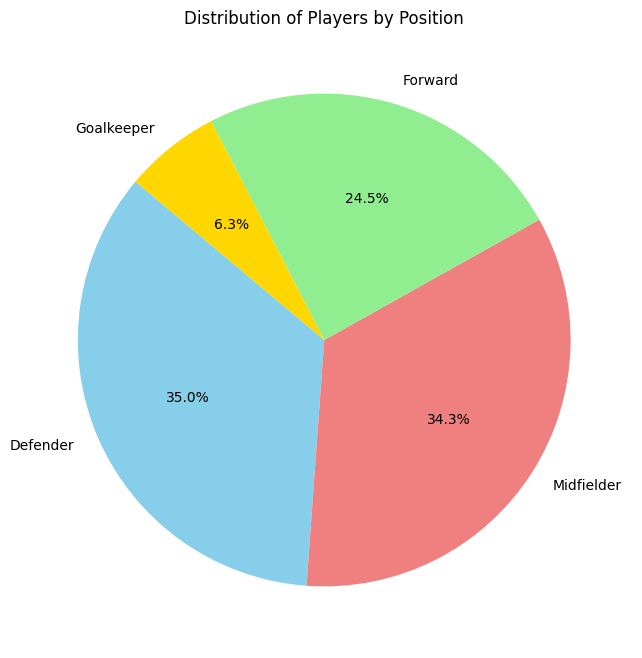

In [ ]:

position_counts = df['Position'].value_counts().reset_index()
position_counts.columns = ['Position', 'Count']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(position_counts['Count'], labels=position_counts['Position'], autopct='%1.1f%%', startangle=140,colors=colors)


filtered_df = df[df['country'] != 'England']
plt.title('Distribution of Players by Position')
plt.show()

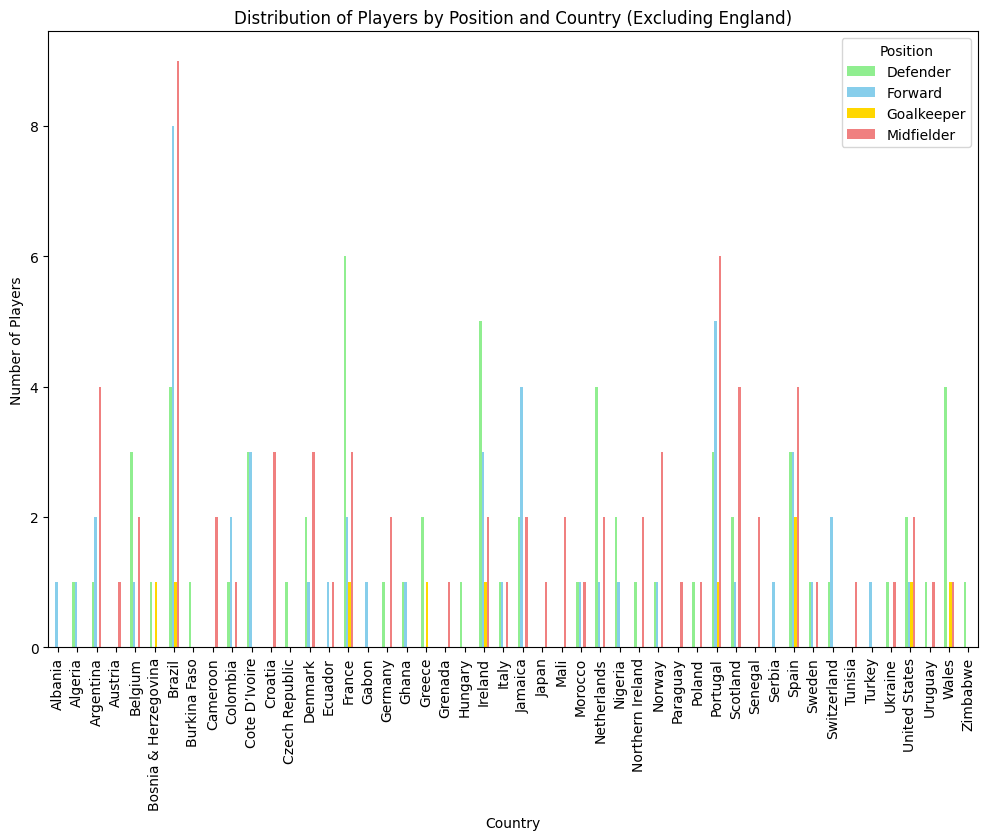

In [ ]:
filtered_df = df[df['country'] != 'England']

pivot_df = filtered_df.pivot_table(index='country', columns='Position', aggfunc='size', fill_value=0)
colors = {'Forward': 'skyblue', 'Midfielder': 'lightcoral', 'Defender': 'lightgreen'}

# Plotting the bar chart with different colors for each position
colors = {
    'Forward': 'skyblue',
    'Midfielder': 'lightcoral',
    'Defender': 'lightgreen',
    'Goalkeeper': 'gold'
}

# Plotting the bar chart with different colors for each position
ax = pivot_df.plot(kind='bar', color=[colors[position] for position in pivot_df.columns], figsize=(12, 8))

plt.title('Distribution of Players by Position and Country (Excluding England)')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.legend(title='Position')
plt.show()

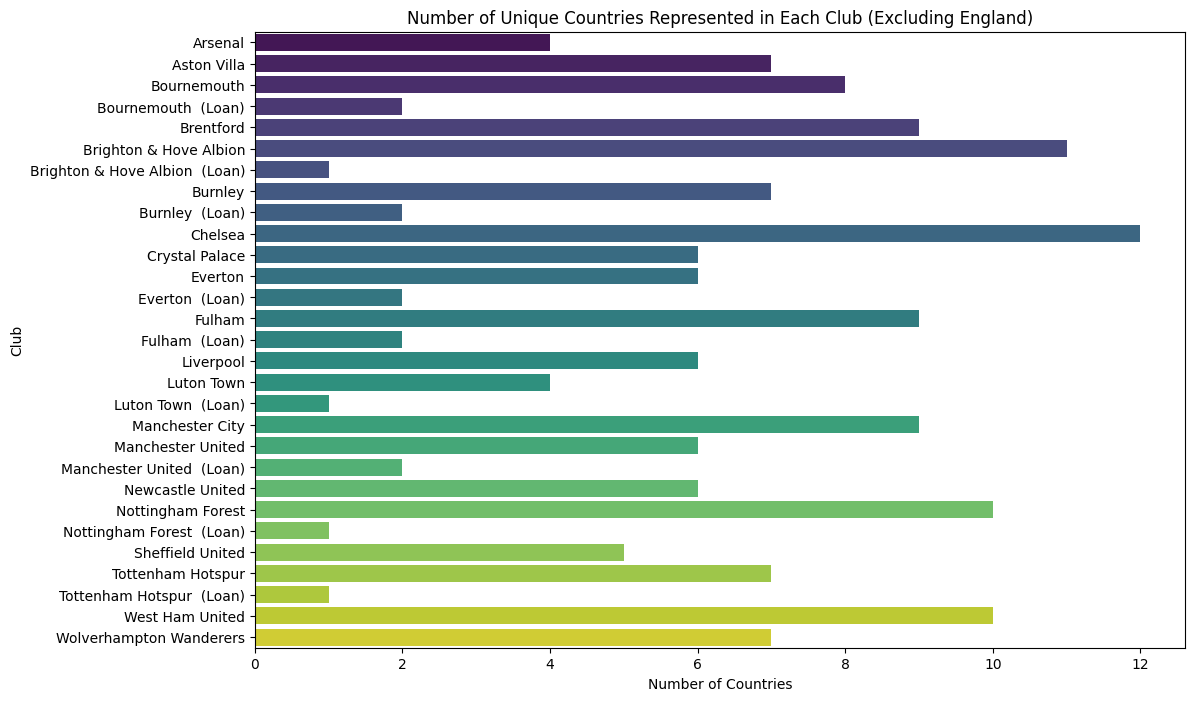

In [ ]:
unique_countries_by_club = filtered_df.groupby('club')['country'].nunique().reset_index()

# Plotting the bar chart using Seaborn
filtered_df = df[df['country'] != 'England']

# Count the number of unique countries for each club
unique_countries_by_club = filtered_df.groupby('club')['country'].nunique().reset_index()

# Plotting the horizontal bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=unique_countries_by_club, x='country', y='club', palette='viridis')

plt.title('Number of Unique Countries Represented in Each Club (Excluding England)')
plt.xlabel('Number of Countries')
plt.ylabel('Club')
plt.show()

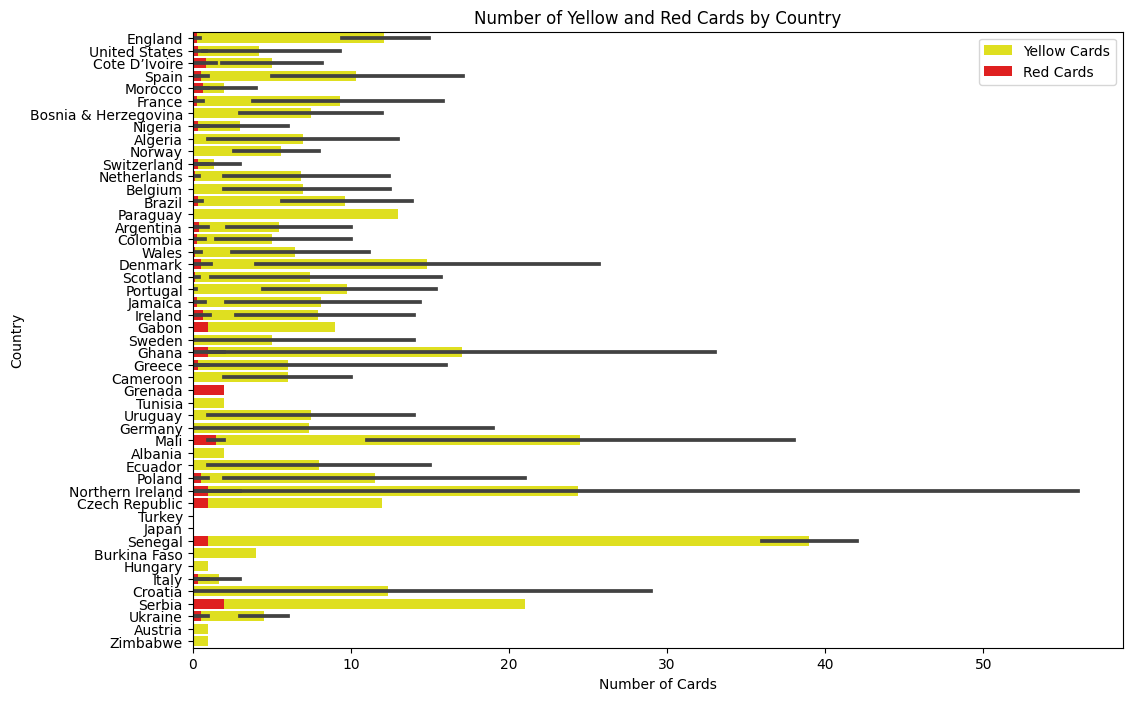

In [ ]:
df_despline=df[['player','Position','yellow_card', 'red_card','country','club','Age']]
df_despline[df_despline['country']!='England']
plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='yellow_card', data=df_despline, color='yellow', label='Yellow Cards')
sns.barplot(y='country', x='red_card', data=df_despline, color='red', label='Red Cards')

plt.title('Number of Yellow and Red Cards by Country')
plt.ylabel('Country')
plt.xlabel('Number of Cards')
plt.legend()
plt.show()

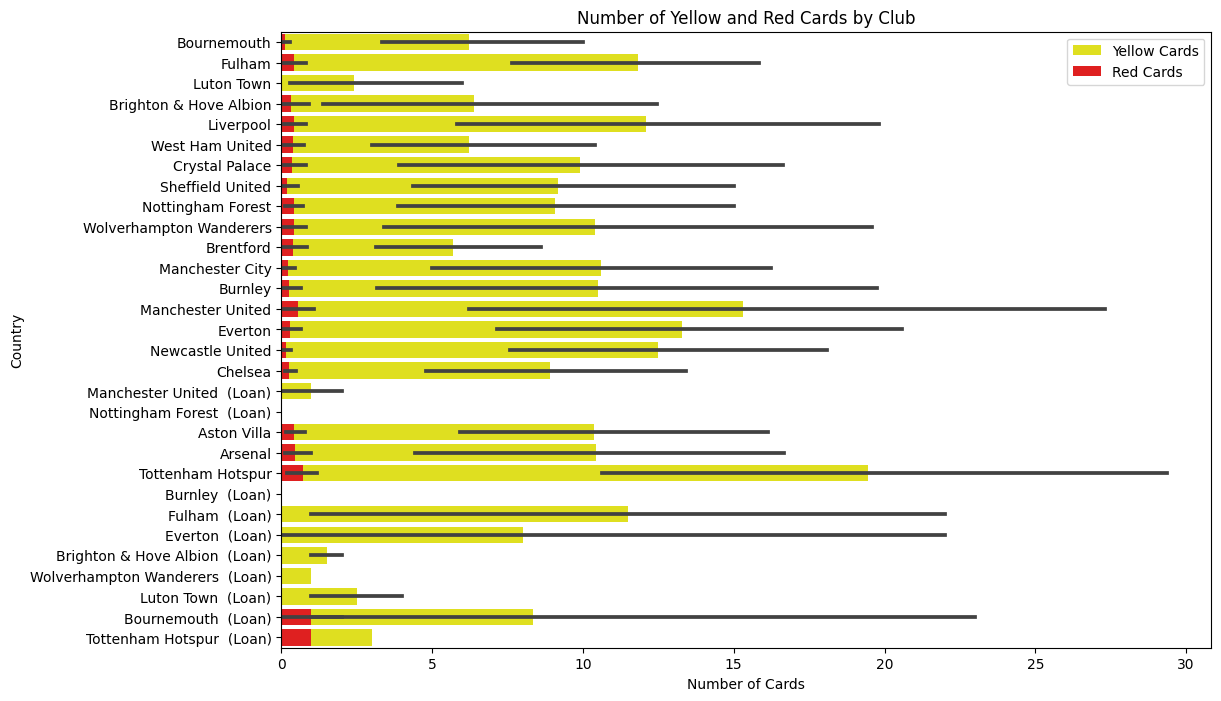

In [ ]:
df_despline=df[['player','Position','yellow_card', 'red_card','country','club']]
plt.figure(figsize=(12, 8))
sns.barplot(y='club', x='yellow_card', data=df_despline, color='yellow', label='Yellow Cards')
sns.barplot(y='club', x='red_card', data=df_despline, color='red', label='Red Cards')

plt.title('Number of Yellow and Red Cards by Club')
plt.ylabel('Country')
plt.xlabel('Number of Cards')
plt.legend()
plt.show()

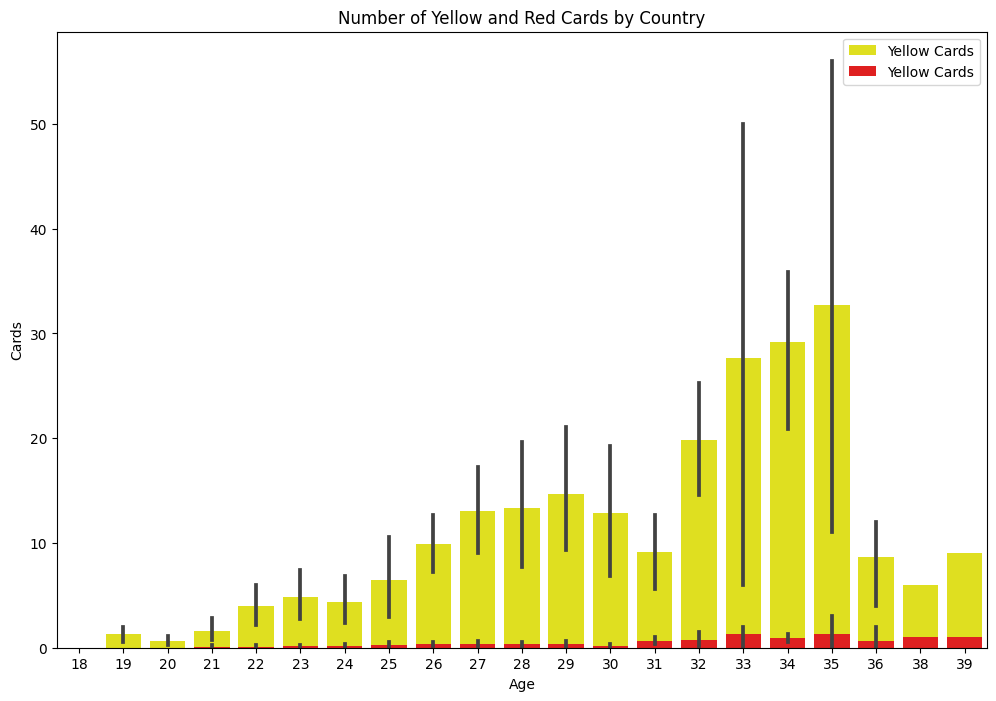

In [ ]:
df_despline=df[['player','Position','yellow_card', 'red_card','country','club','Age']]
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='yellow_card', data=df_despline, color='yellow', label='Yellow Cards')
sns.barplot(x='Age', y='red_card', data=df_despline, color='red', label='Yellow Cards')


plt.title('Number of Yellow and Red Cards by Country')
plt.ylabel('Cards')
plt.xlabel('Age')
plt.legend()
plt.show()

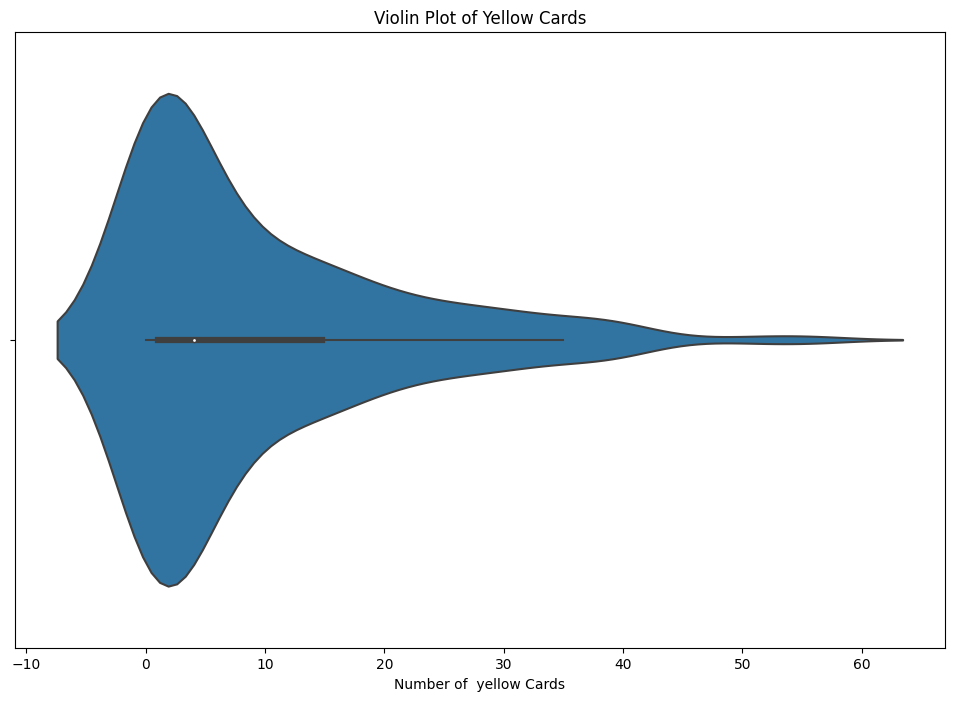

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df['yellow_card'])
plt.title('Violin Plot of Yellow Cards')
plt.xlabel('Number of  yellow Cards')
plt.show()


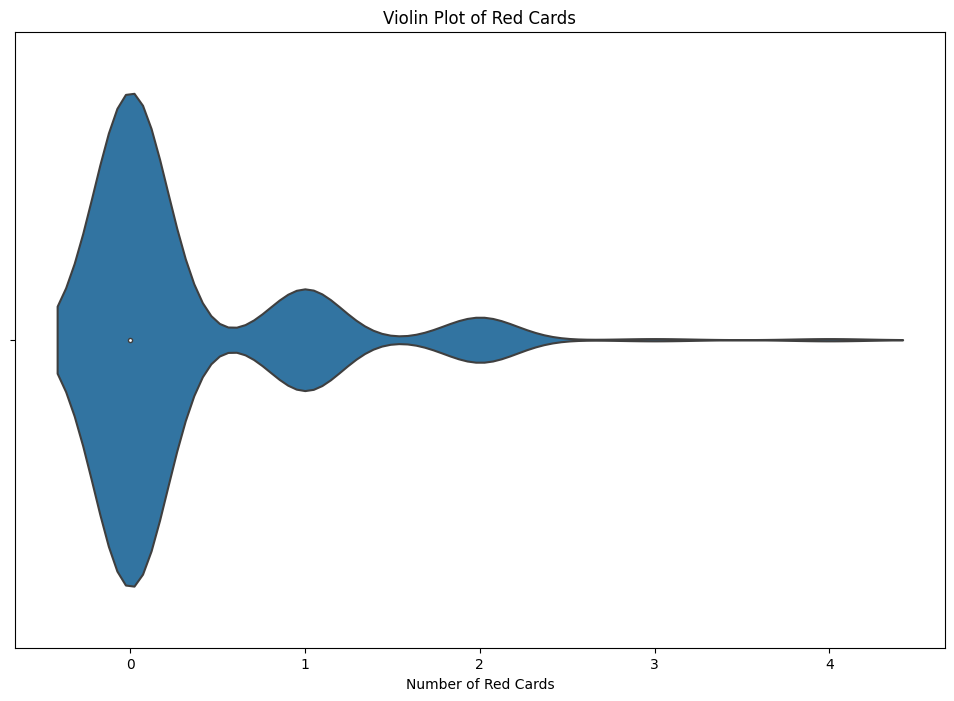

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=df_despline['red_card'])
plt.title('Violin Plot of Red Cards')
plt.xlabel('Number of Red Cards')
plt.show()


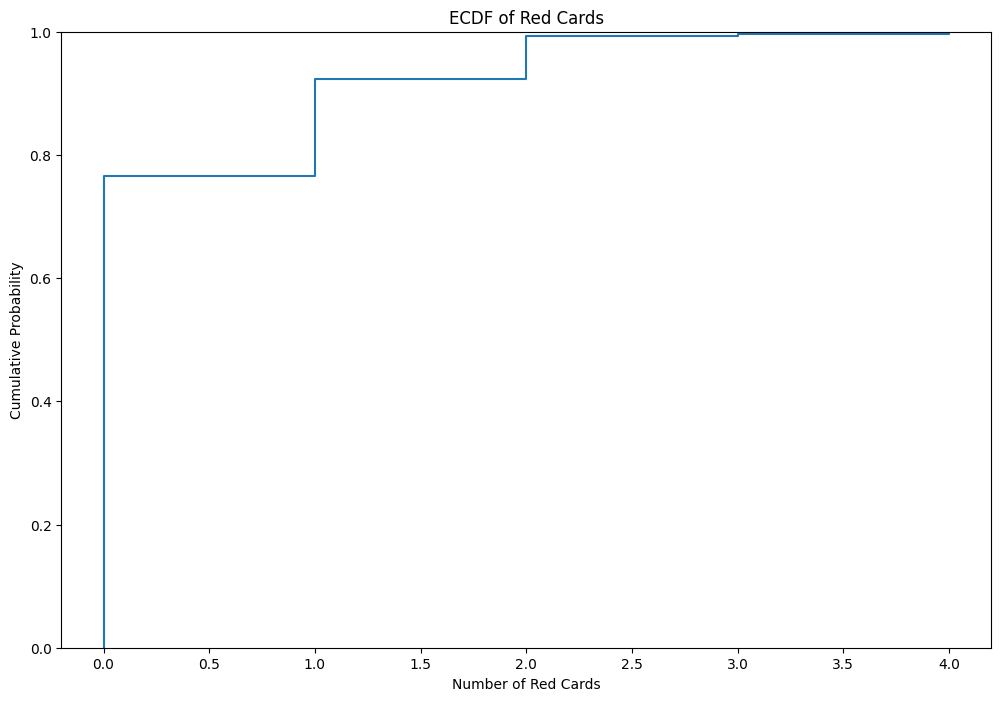

In [ ]:
plt.figure(figsize=(12, 8))
sns.ecdfplot(df['red_card'])
plt.title('ECDF of Red Cards')
plt.xlabel('Number of Red Cards')
plt.ylabel('Cumulative Probability')
plt.show()


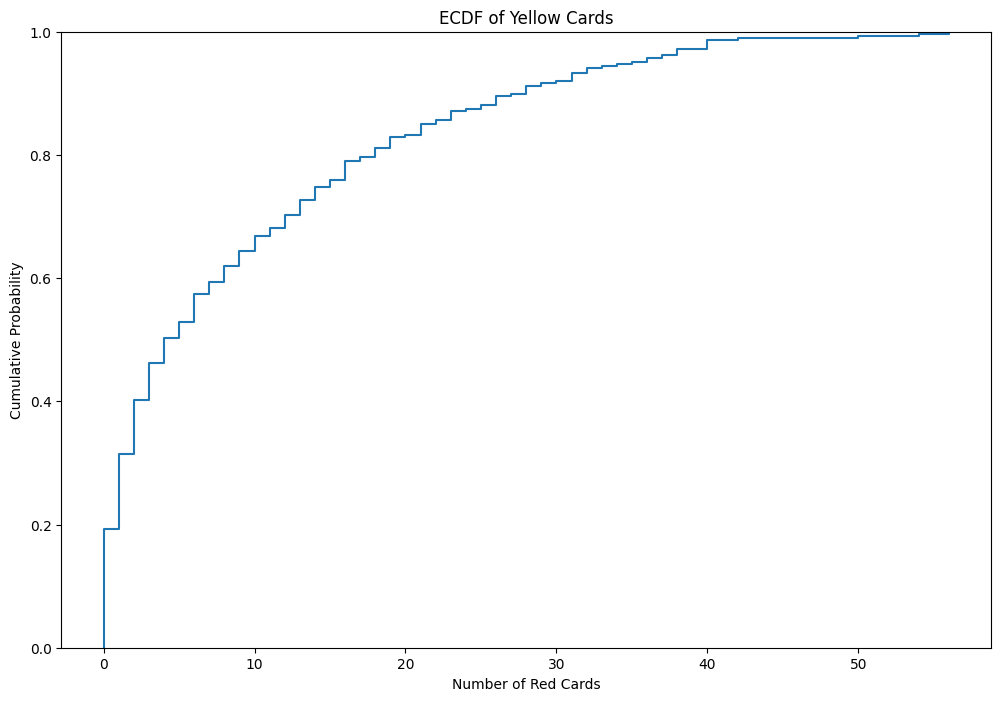

In [ ]:
plt.figure(figsize=(12, 8))
sns.ecdfplot(df['yellow_card'])
plt.title('ECDF of Yellow Cards')
plt.xlabel('Number of Red Cards')
plt.ylabel('Cumulative Probability')
plt.show()


In [ ]:
df_despline=df[['player','Position','yellow_card', 'red_card','country','club','Age','duel_lost','clearance_off_line','won_tackle','clean_sheet','duel_won']]


In [ ]:
# Convert 'won_tackle' to float directly (without using .str)
# Remove percentage symbol and convert to float
df_despline['won_tackle'] = df_despline['won_tackle'].replace('%', '', regex=True).astype('float')/100


# Fill NaN values with 0
df_despline['won_tackle'].fillna(0, inplace=True)

# Continue with the rest of the calculations

df_despline['clearance_off_line'].astype('float')



<ipython-input-18-bb166d559e4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despline['won_tackle'] = df_despline['won_tackle'].replace('%', '', regex=True).astype('float')/100
<ipython-input-18-bb166d559e4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despline['won_tackle'].fillna(0, inplace=True)


0      4.0
3      0.0
4      0.0
6      0.0
8      0.0
      ... 
582    0.0
583    0.0
584    0.0
586    0.0
589    0.0
Name: clearance_off_line, Length: 286, dtype: float64

In [ ]:
# Convert 'duel_lost' to float, handling non-numeric values
df_despline['duel_lost'] = pd.to_numeric(df_despline['duel_lost'], errors='coerce')

# Fill NaN values with 0
df_despline['duel_lost'].fillna(0, inplace=True)

# Now convert to float
df_despline['duel_lost'] = df_despline['duel_lost'].astype('float')
# Convert 'duel_lost' to float, handling non-numeric values
df_despline['duel_won'] = pd.to_numeric(df_despline['duel_won'], errors='coerce')

# Fill NaN values with 0
df_despline['duel_won'].fillna(0, inplace=True)

# Now convert to float
df_despline['duel_won'] = df_despline['duel_won'].astype('float')

df_despline.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player              286 non-null    object 
 1   Position            286 non-null    object 
 2   yellow_card         286 non-null    float64
 3   red_card            286 non-null    float64
 4   country             286 non-null    object 
 5   club                286 non-null    object 
 6   Age                 286 non-null    int64  
 7   duel_lost           286 non-null    float64
 8   clearance_off_line  286 non-null    float64
 9   won_tackle          286 non-null    float64
 10  clean_sheet         286 non-null    float64
 11  duel_won            286 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 29.0+ KB


<ipython-input-19-91905dd771cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despline['duel_lost'] = pd.to_numeric(df_despline['duel_lost'], errors='coerce')
<ipython-input-19-91905dd771cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despline['duel_lost'].fillna(0, inplace=True)
<ipython-input-19-91905dd771cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
def calculate_defensive_rating(row):
    weights = {
        'duel_lost': 0.2,
        'clearance_off_line': 0.2,
        'won_tackle': 0.2,
        'clean_sheet': 0.2,
        'duel_won': 0.2,
        'yellow_card': 0.7,
        'red_card': 0.8
    }

    rating = 0
    for attr, weight in weights.items():
        value = row[attr]

        if isinstance(value, (list, tuple, np.ndarray)):
            # If the attribute is a sequence, calculate the average
            value = np.mean(value)

        rating += weight * value

    # Normalize the rating to a scale of 0 to 10
    normalized_rating = (rating / sum(weights.values()))/10
    return round(normalized_rating,2)


df_despline['defensive_rating'] = df_despline.apply(calculate_defensive_rating, axis=1)
max_defensive_rating_row = df_despline.loc[df_despline['defensive_rating'].idxmax()]
print(max_defensive_rating_row)


player                Ben Chilwell
Position                  Defender
yellow_card                   19.0
red_card                       1.0
country                    England
club                       Chelsea
Age                             27
duel_lost                    769.0
clearance_off_line             1.0
won_tackle                    0.62
clean_sheet                   39.0
duel_won                     907.0
defensive_rating              14.3
Name: 169, dtype: object


In [ ]:


# Filter the DataFrame for players with the position 'Defender'
df_defenders = df_despline[df_despline['Position'] == 'Defender']

# Sort the DataFrame by 'defensive_rating' in ascending order to get the lowest rating first

df_despline = df_despline[(df_despline['Position'] == 'Defender') & (df_despline['defensive_rating'] != 0)]

import plotly.express as px

def myWorstPlot(df, grpVar, yVar, stat='min', cols=None, top=10, position=None):
    if cols:
        tmp = df[cols].copy()
    else:
        tmp = df.copy()

    data = tmp.nsmallest(top, 'defensive_rating').reset_index()

    title = f"Worst {top} {position} (Defensive Rating)"

    # Create a bar chart with Plotly Express
    bar_chart = px.bar(data, x=grpVar, y=yVar, title=title, color=grpVar, text=yVar)
    bar_chart.update_layout(
        xaxis_title=f"{grpVar.replace('_', ' ')}".title(),
        yaxis_title="Defensive Rating".title()
    )
    bar_chart.show()
    return data

# Example usage:
worst_defenders_data = myWorstPlot(df_despline, 'player', 'defensive_rating', top=10, position='Defenders')


In [ ]:
# Assuming you have another numeric column named 'other_column'
correlation = df_despline['defensive_rating'].corr(df_despline)
print(correlation)


ValueError: ignored

In [ ]:
a=df_despline.corr()
a['defensive_rating']

<ipython-input-55-112e59bbde1c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



yellow_card           0.684209
red_card              0.389536
Age                   0.481150
duel_lost             0.890161
clearance_off_line    0.347600
won_tackle            0.130378
clean_sheet           0.640215
duel_won              0.833614
defensive_rating      1.000000
Name: defensive_rating, dtype: float64